# Seaborn
- matplotlib 기반, python 데이터 visualization library
- 통계 그래픽 그리기 위한 고급 인터페이스 제공

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

- style 처리 : R의 ggplot과 유사하도록 처리

In [4]:
from matplotlib import style
style.use('ggplot')

In [5]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

### **한글 폰트 지정**

In [7]:
import sys

from matplotlib import font_manager, rc

if sys.platform == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'
elif sys.platform == 'win32':
    path = 'c:/Windows/Fonts/malgun.ttf'
else:
    print('Unknown System')

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

### **파이그래프**

In [8]:
# 원 그래프에 들어가 레이블과 비율
labels = ['Samsung', 'Sk', 'LG' , 'Naver' , 'Kakao']
ratio = [50,20,10,10,10]

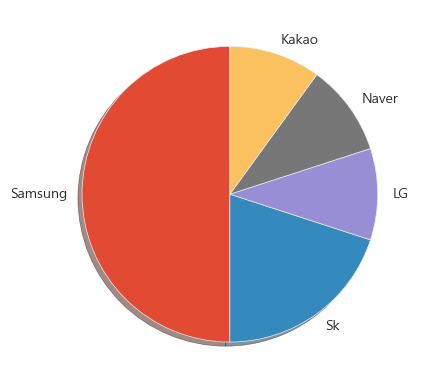

In [9]:
# 파이 그래프
plt.pie(ratio, labels = labels, shadow = True, startangle=90) 
plt.show()

### **PyeChart로 파이 그래프 그리기**

In [12]:
#pip install pyecharts

In [14]:
import pyecharts.charts as cht  ## 동적인 시각화 모듈 사용
from pyecharts import options as opts

In [22]:
pie = cht.Pie()  # 동적인 그래프

pie.add('회사 규모', list(zip(labels, ratio)),  radius =100)

pie.set_global_opts(title_opts=opts.TitleOpts(title='주요 기업', subtitle='2018 revenue'),
                    toolbox_opts=opts.ToolboxOpts())
pie.render_notebook()

### **Seaborn chart**
- DataFrame있어야함
- 일단 Seaborn 내부 안에 있는 테스트용 dataframe이용해서 실습할것

In [23]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [25]:
tips.shape

(244, 7)

- 전체 비용에 따른 팁 정도
- 성별에 따른 팁 정도
- 흡연자/비흡연자에 따른 팁 정도

In [27]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [28]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [29]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [30]:
tips.describe()
# 숫자로 된 자료 통계
# 카운트, 평균, 산포도, 최소, 25%, 50%(중간값), 최대

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### **점 그래프: Plot 그래프** 

In [31]:
tips['size'].value_counts() # size 열 통계

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

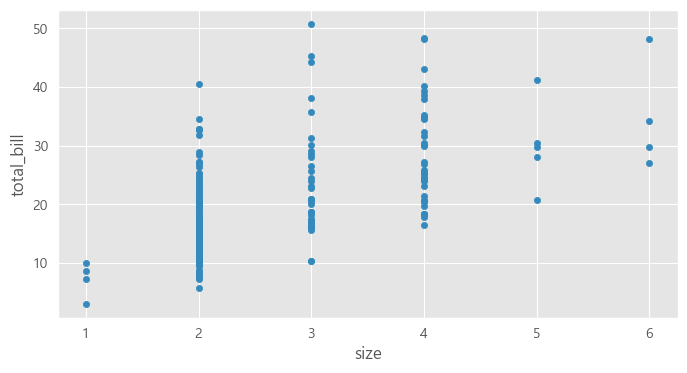

In [32]:
# scatter 그래프
# dataframe.plot(x=x할 컬럼, y=y할 컬럼, kind=종류, figsize=도화지크기)

tips.plot(x='size', y='total_bill', kind='scatter', figsize=(8,4))
plt.show()

In [33]:
# 요일별 통계 : categorical data
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

**strip plot**
- 카테고리형 데이터
- 일반 plot그래프보다 퍼져서 데이터 분포를 보여줌

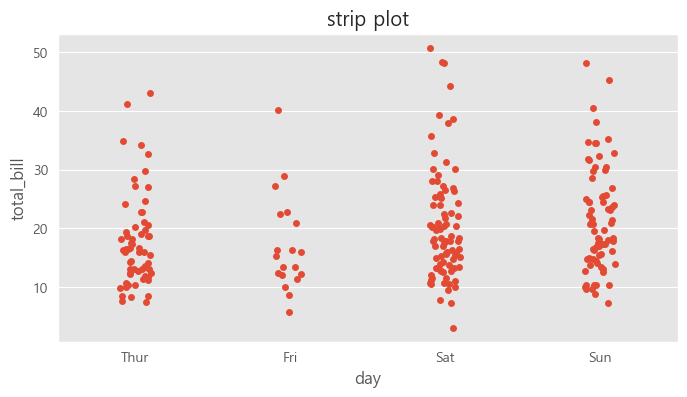

In [35]:
# stripplot (categorical data)
# x, y : dataframe의 컬럼 지정
# data : 실제 dataframe
# ax : axes 객체 전달

fig, ax = plt.subplots(figsize=(8,4)) # 기본 그래프로 캔버스, axes만든다.
sns.stripplot(x='day', y='total_bill', data=tips, ax=ax)
plt.title('strip plot')
plt.show()

**swarmplot**
- strip plot 보다 겹치지 않게 가로로 데이터를 펼친 plot 그래프

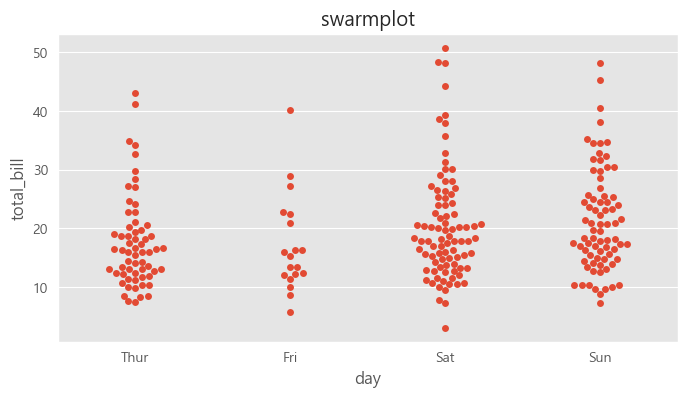

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
sns.swarmplot(x='day', y='total_bill', data=tips, ax=ax)

plt.title('swarmplot')
plt.show()

### **boxplot: 상자 그래프**
- 이상치 알아보기 좋음
- 이상치, 1/4, 2/4, 3/4 등 알아보기 쉬움

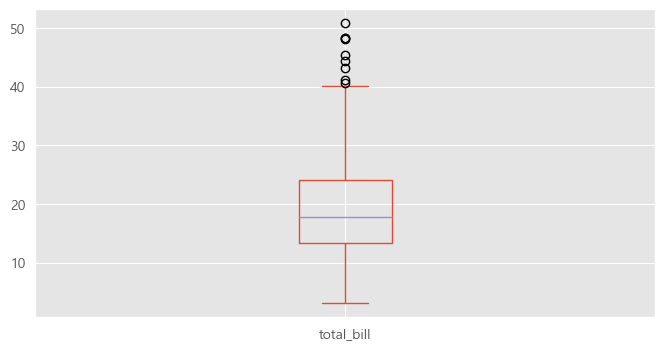

In [37]:
tips.plot.box(y='total_bill', figsize=(8,4))
plt.show()

- 요일별 total_bill 그래프

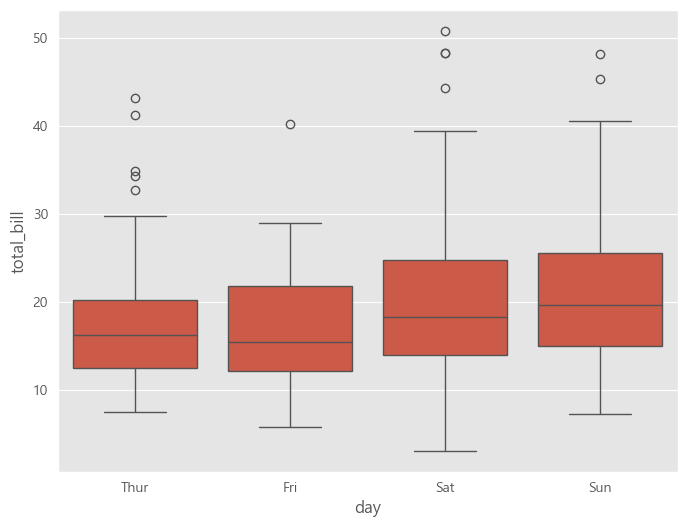

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

- 3차원도 보여줌
- hue (2차원 -> 3차원으로 또 나눈다.)
    - 일단 날짜로 나누고, hue (smoker)기준으로 또 나눈다.

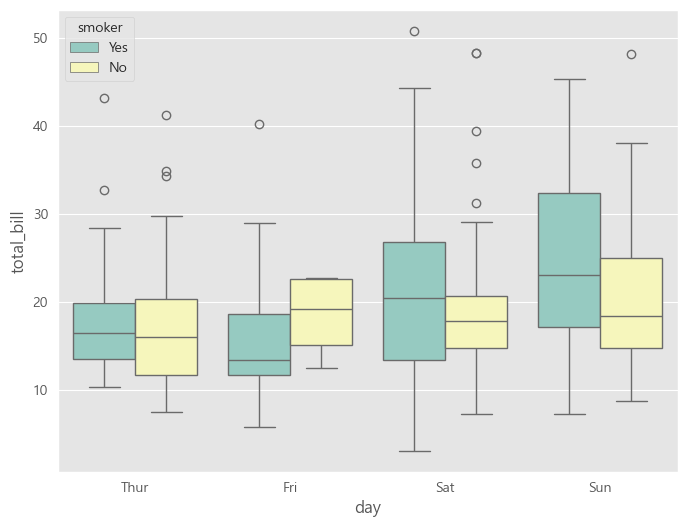

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')
plt.show()

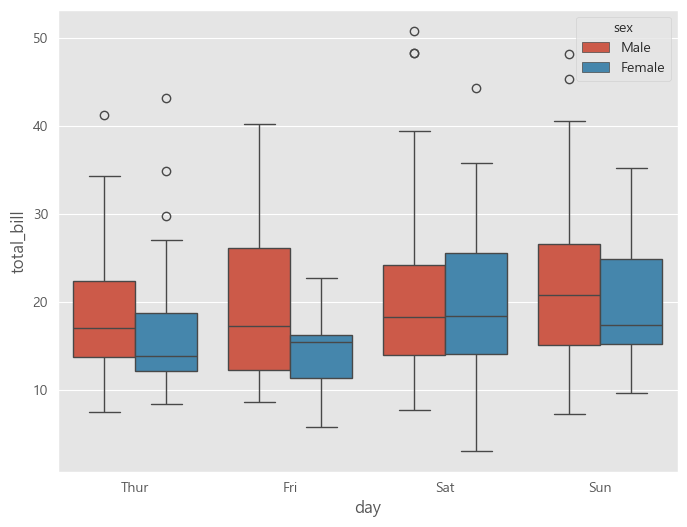

In [45]:
# 성별에 따른 요일별 결과
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)
plt.show()

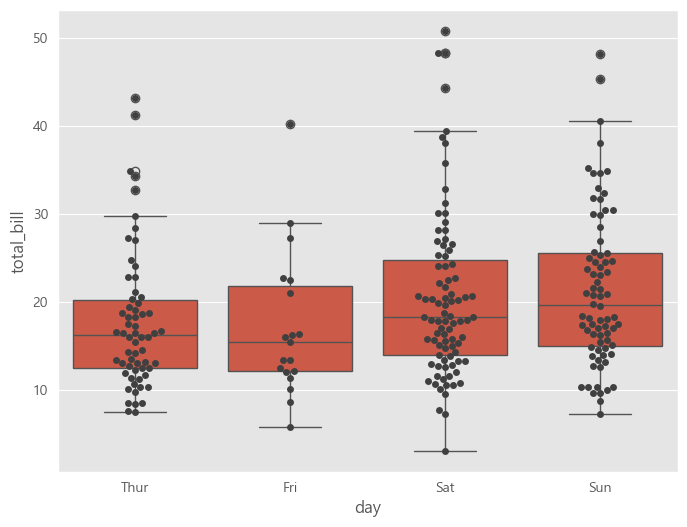

In [44]:
# swarmplot이랑 boxplot이랑 둘다 보여주기
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')
plt.show()

### lmplot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


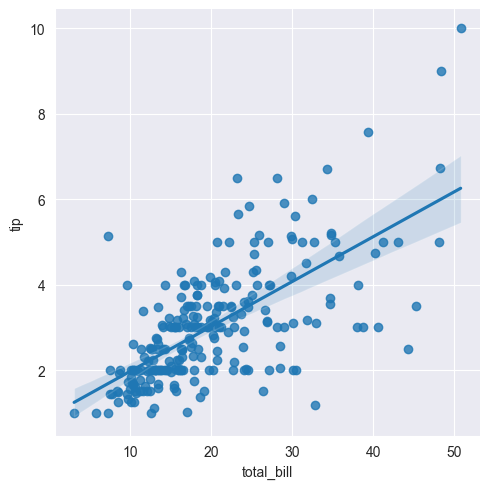

In [9]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

- total_bill랑 tip이랑 양의 상관관계

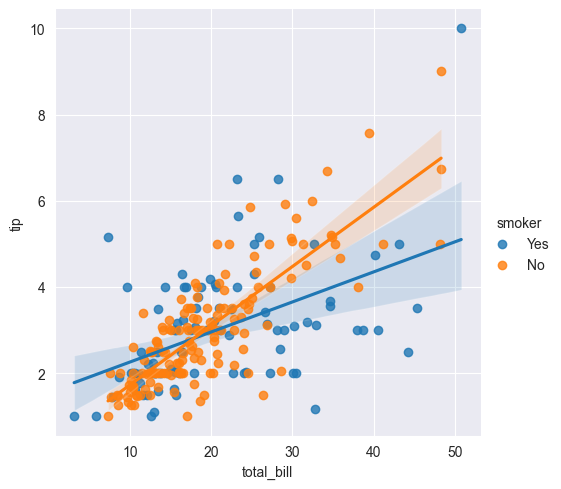

In [11]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.show()

- hue로 smoker 여부를 또 나눠서 보여준다.
- 비흡연집단이 팁을 더 많이 준다.(높은 양의 상관관계)

## **heatmap**
- heatmap을 그릴때는 **pivot table**로 변경한 후에 하는 것이 좋다!!

In [43]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [27]:
flights.shape

(144, 3)

In [32]:
import pandas as pd

In [42]:
# 피봇 테이블로 변
# df.pivot(index='..', columns='', values='')  # inplace 안됨
flights =flights.pivot(columns='year',index='month', values= 'passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


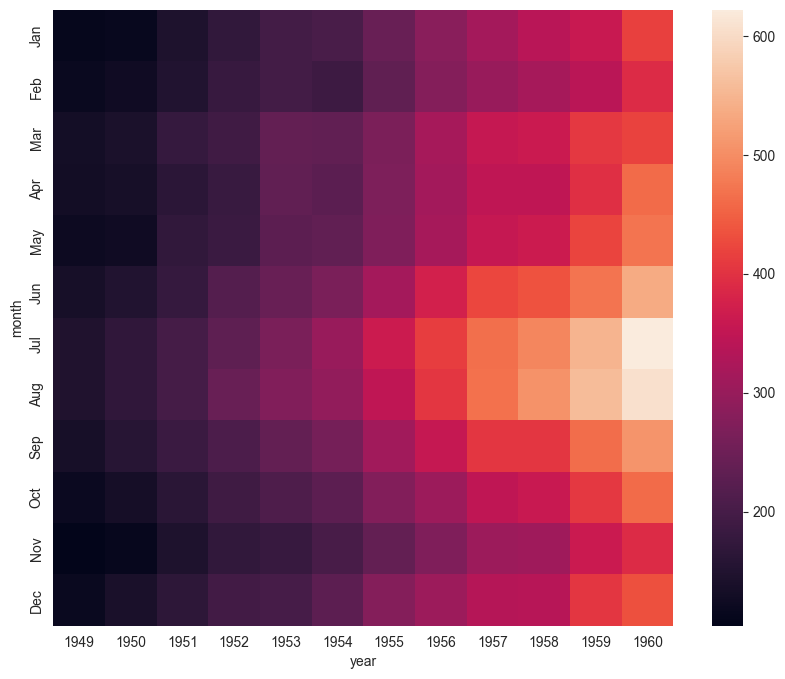

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(flights)
plt.show()

- 색이 연해질수록 높은 수치
- 해가 가면 갈수록 연해짐 (비행기를 더 타니까)
- 7월이 제일 낮음 (여름 휴가)

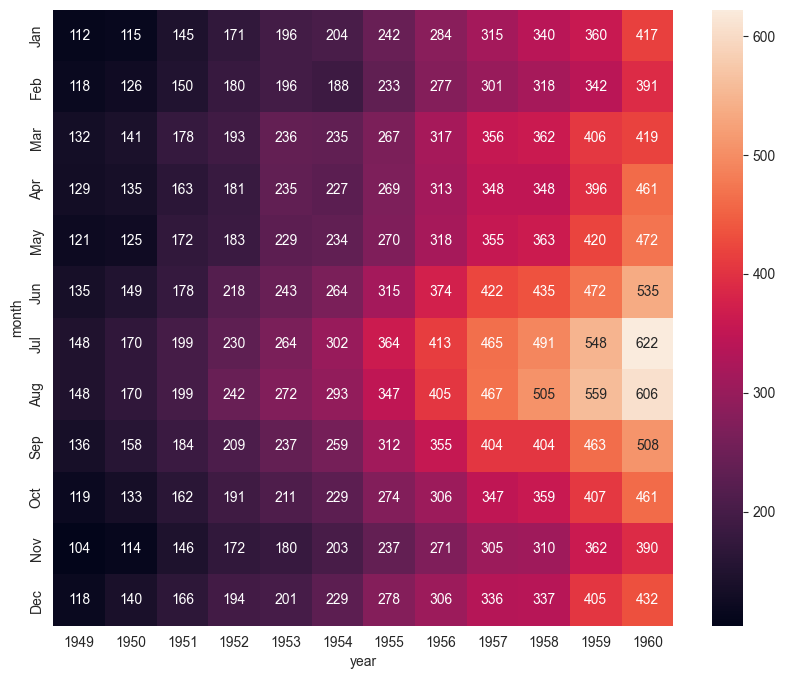

In [46]:
# 승객수 찍어주기 annot
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='g')
plt.show()

## **pairplot**

In [47]:
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [48]:
iris.shape

(150, 5)

- 대칭됨! -> 대각선 위 아래중 하나만 보면 된다.
- 선형관계인지(양/음의 관계) 흩어져있는지(아무 관계 없음) 보기

<Figure size 400x400 with 0 Axes>

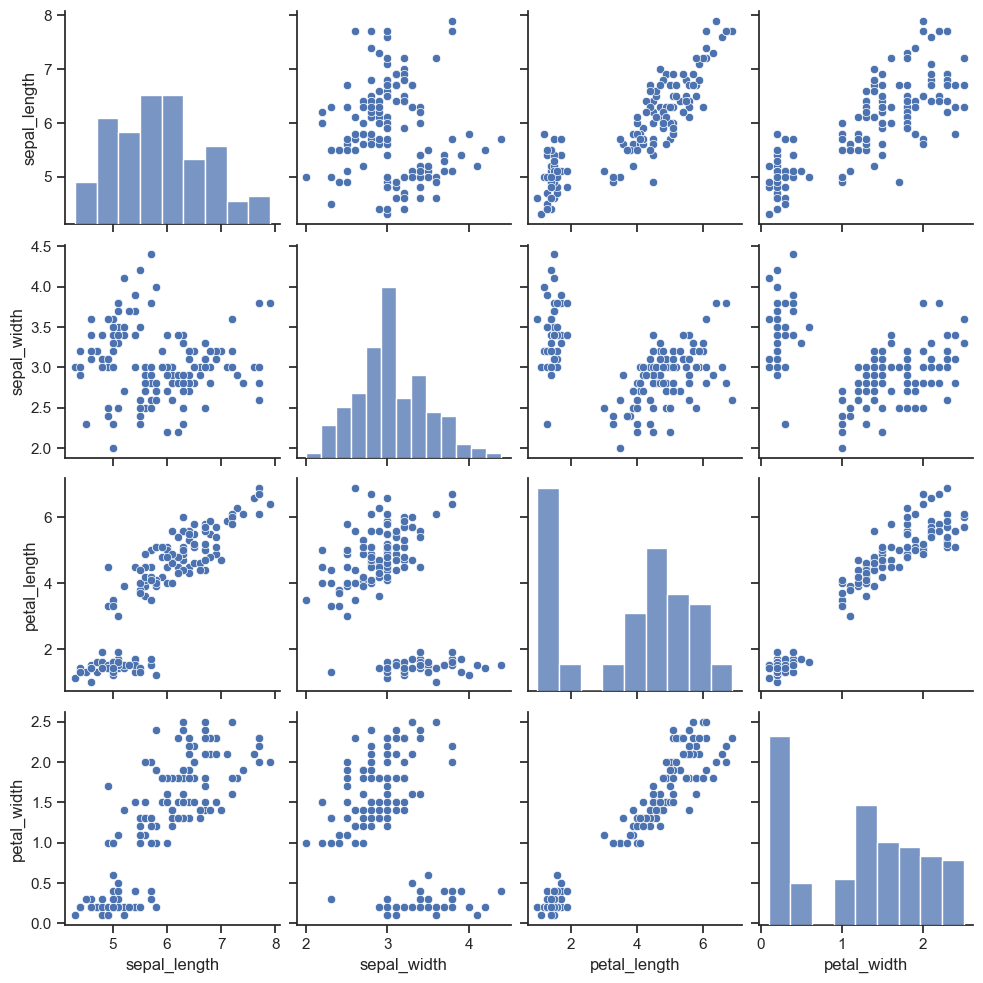

In [50]:
# pairplot
plt.figure(figsize=(4,4))
sns.pairplot(iris)
plt.show()

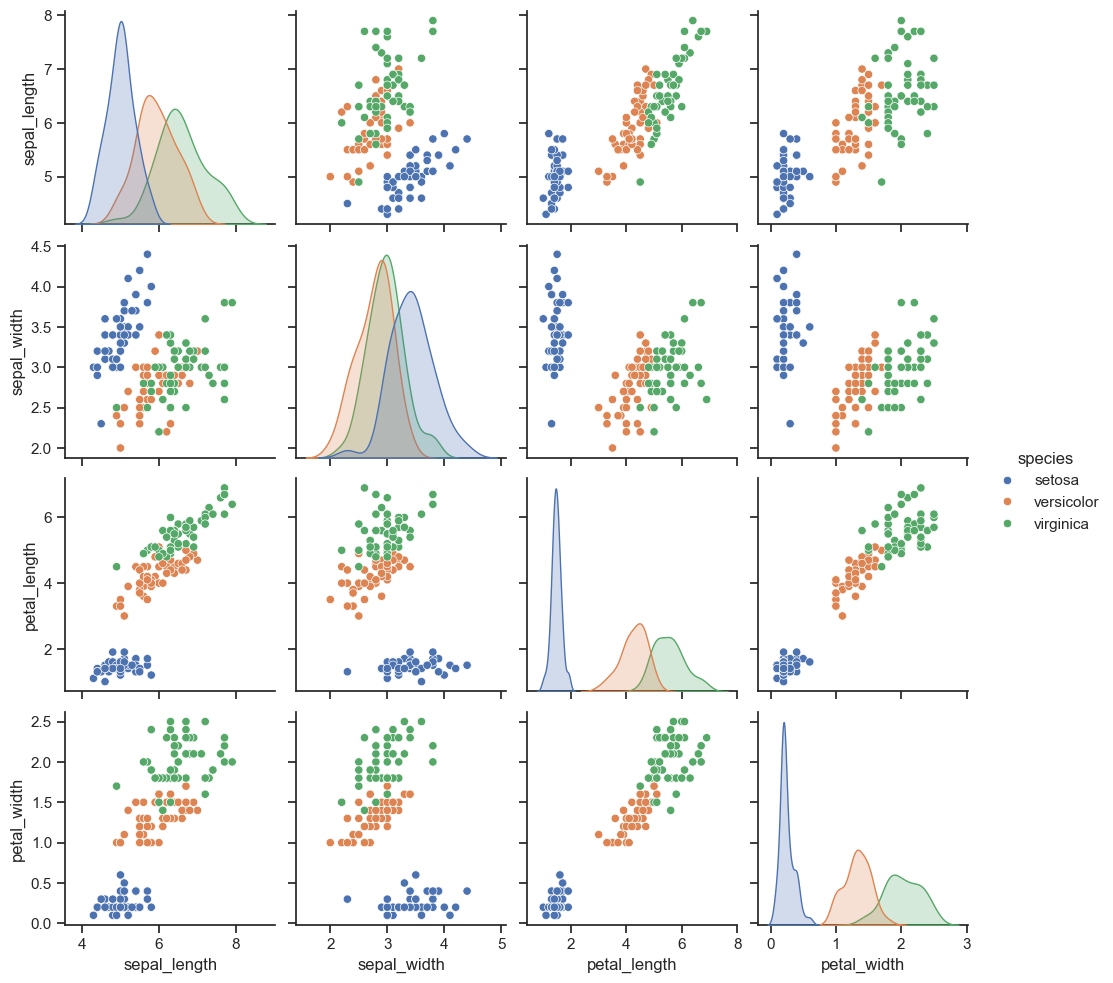

In [51]:
# 종별로 2차 구분해주기 (hue)
sns.pairplot(iris, hue='species')
plt.show()

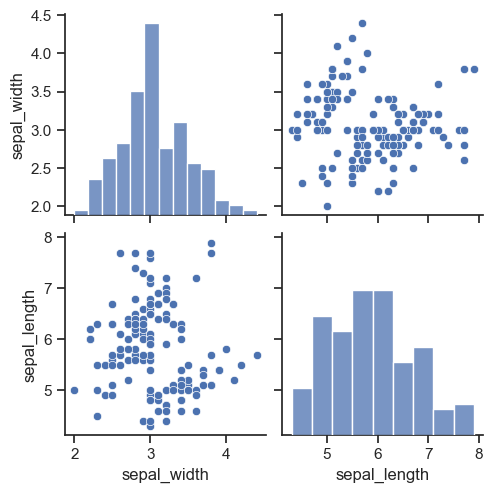

In [54]:
# 특정 attribute만 뽑아서 보려면 vars 지정
sns.pairplot(iris, vars=['sepal_width', 'sepal_length'])
plt.show()

### **corr  상관계수**
- 1에 가까울수록 양의 상관관계
- -1에 가까울수록 음의 상관관계

In [57]:
# iris.corr()  # string 자료형이 있어서 불가능

In [60]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [67]:
# species column drop
iris2 = iris.drop(['species'], axis=1)

In [68]:
iris2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
